In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
platforms = {
    'telegram.me': 'Telegram',
    'vk.com': 'ВКонтакте',
    'www.youtube.com': 'YouTube',
    'dzen.ru': 'Дзен',
    'www.instagram.com': 'Instagram',
    'twitter.com': 'Twitter',
    'ok.ru': 'Одноклассники',
    'www.facebook.com': 'Facebook', 
    'rutube.ru': 'rutube.ru'
}

In [29]:
def get_platform(url):
    for key in platforms:
        if key in url:
            return platforms[key]
    return 'Другие'

banks = ['zenit', 'stnd', 'dom', 'loko', 'msk', 'mts', 'raif', 'rnkb', 'ros', 'gos', 'ural']  # Замените на ваш реальный список банков
files = [f'{bank}.xlsx' for bank in banks]

special_bank = 'PSB'
special_files = {
    'September': f'{special_bank}_september.xlsx',
    'October': f'{special_bank}_october.xlsx',
    'November': f'{special_bank}_november.xlsx',
    'December': f'{special_bank}_december.xlsx'
}

months_data = {
    'September': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]},
    'October': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]},
    'November': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]},
    'December': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]}
}

In [30]:
for file, bank in zip(files, banks):
    df = pd.read_excel(file, skiprows=5)
    
    try:
        df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')
    except Exception as e:
        print(f"Error parsing dates for {bank}: {e}")
    
    df = df.dropna(subset=['Дата'])
    
    if not pd.api.types.is_datetime64_any_dtype(df['Дата']):
        raise ValueError(f"Date parsing failed for {bank}")
    
    df['Месяц'] = df['Дата'].dt.strftime('%B')

    df['Ссылка'] = df['Ссылка'].astype(str)

    df['Платформа'] = df['Ссылка'].apply(get_platform)

    for month in months_data:
        monthly_data = df[df['Месяц'] == month]
        for platform in platforms.values():
            platform_data = monthly_data[monthly_data['Платформа'] == platform]
            months_data[month][bank][platform]['positive'] += (platform_data['Тональность'] == 'позитивная').sum()
            months_data[month][bank][platform]['negative'] += (platform_data['Тональность'] == 'негативная').sum()

In [33]:
months_data

{'September': {'zenit': {'Telegram': {'positive': 7, 'negative': 1359},
   'ВКонтакте': {'positive': 67, 'negative': 33},
   'YouTube': {'positive': 2, 'negative': 3},
   'Дзен': {'positive': 3, 'negative': 7},
   'Instagram': {'positive': 2, 'negative': 0},
   'Twitter': {'positive': 3, 'negative': 0},
   'Одноклассники': {'positive': 6, 'negative': 12},
   'Facebook': {'positive': 4, 'negative': 0},
   'rutube.ru': {'positive': 2, 'negative': 2}},
  'stnd': {'Telegram': {'positive': 56, 'negative': 15},
   'ВКонтакте': {'positive': 5, 'negative': 21},
   'YouTube': {'positive': 0, 'negative': 0},
   'Дзен': {'positive': 0, 'negative': 4},
   'Instagram': {'positive': 1, 'negative': 1},
   'Twitter': {'positive': 0, 'negative': 0},
   'Одноклассники': {'positive': 0, 'negative': 8},
   'Facebook': {'positive': 0, 'negative': 1},
   'rutube.ru': {'positive': 2, 'negative': 4}},
  'dom': {'Telegram': {'positive': 137, 'negative': 46},
   'ВКонтакте': {'positive': 146, 'negative': 79},
 

In [32]:
for month, file in special_files.items():
    df = pd.read_excel(file)
    
    try:
        df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')
    except Exception as e:
        print(f"Error parsing dates for {special_bank} ({month}): {e}")

    df = df.dropna(subset=['Дата'])

    if not pd.api.types.is_datetime64_any_dtype(df['Дата']):
        raise ValueError(f"Date parsing failed for {special_bank} ({month})")
    
    df['Месяц'] = df['Дата'].dt.strftime('%B')

    df['Ссылка'] = df['Ссылка'].astype(str)

    df['Платформа'] = df['Ссылка'].apply(get_platform)

    for platform in platforms.values():
        platform_data = df[df['Платформа'] == platform]
        months_data[month][special_bank][platform]['positive'] += (platform_data['Тональность'] == 'позитивная').sum()
        months_data[month][special_bank][platform]['negative'] += (platform_data['Тональность'] == 'негативная').sum()

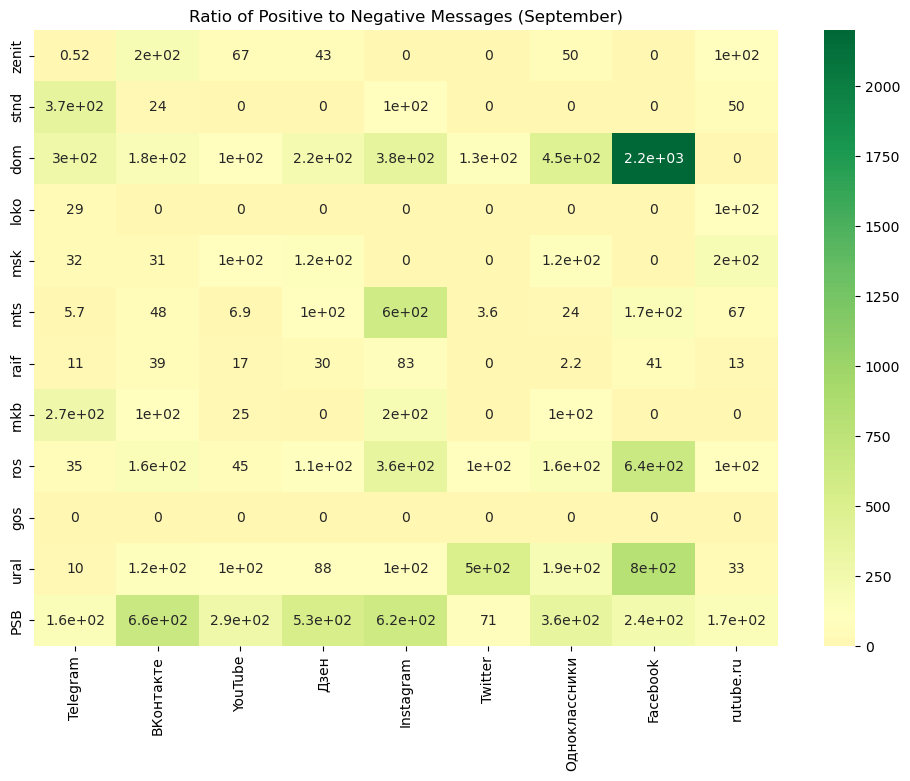

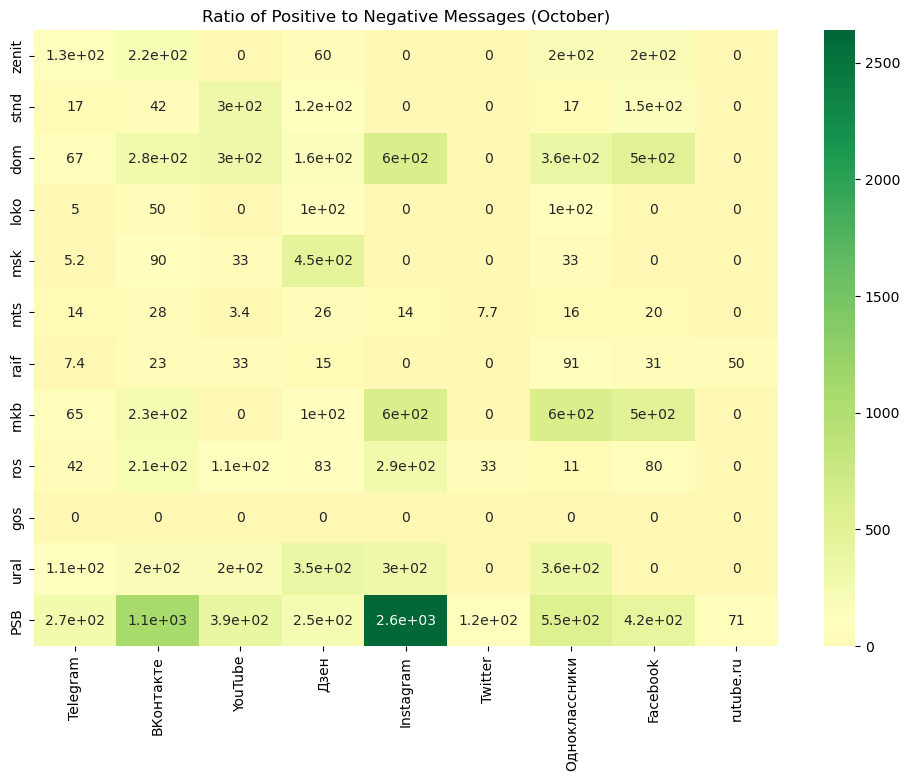

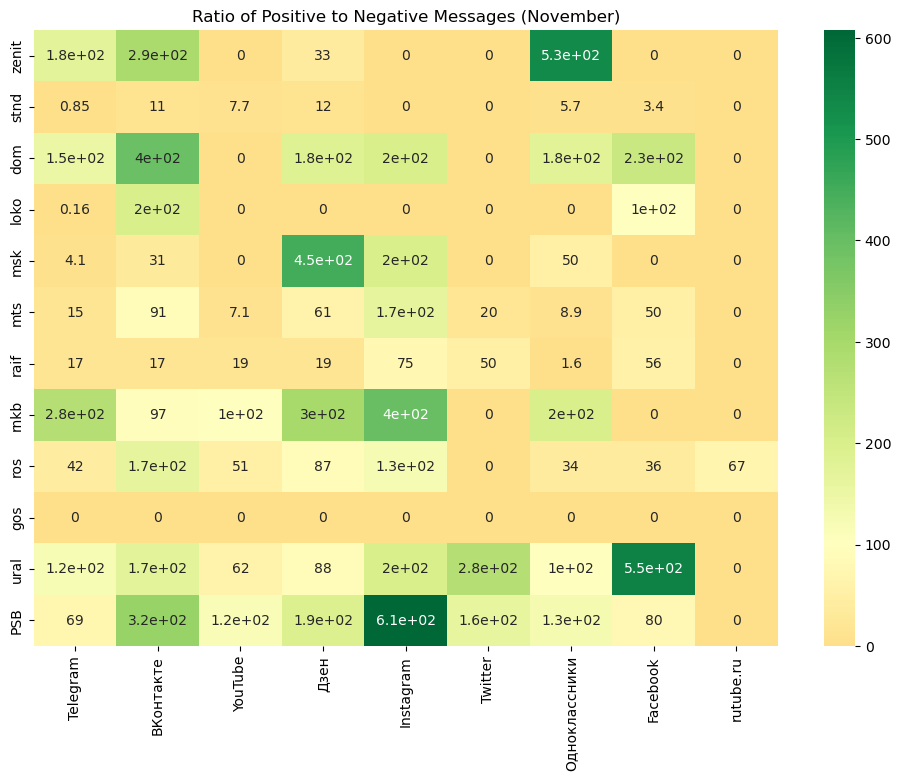

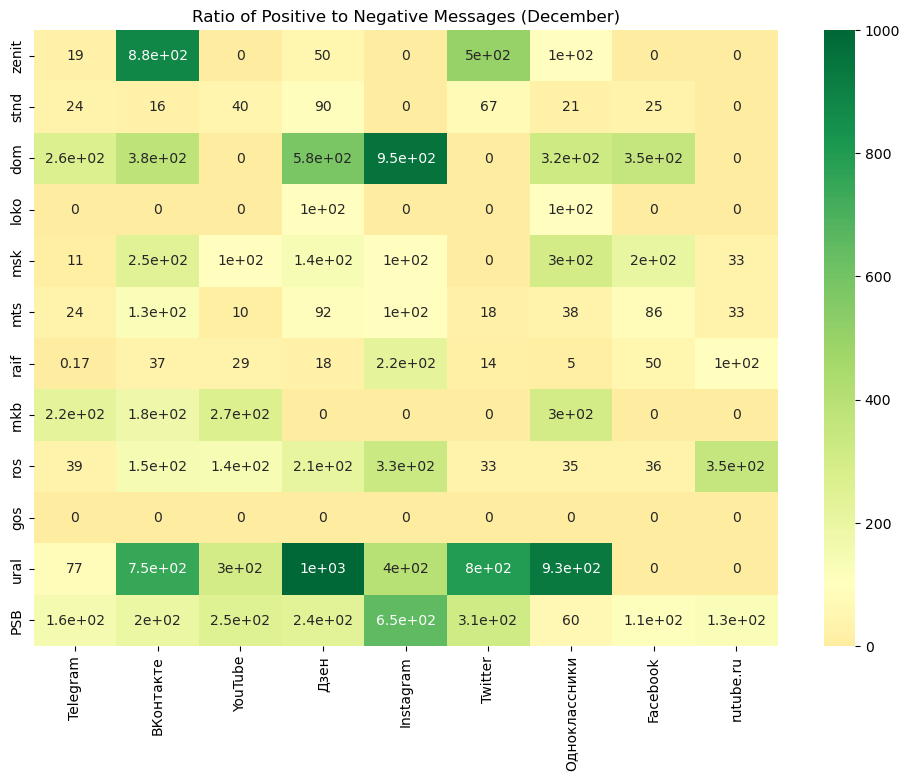

In [34]:
def calculate_ratio(positive, negative):
    return (positive / negative) * 100 if negative != 0 else 0

for month in months_data:
    heatmap_data = pd.DataFrame(index=banks + [special_bank], columns=platforms.values())
    for bank in banks + [special_bank]:
        for platform in platforms.values():
            positive = months_data[month][bank][platform]['positive']
            negative = months_data[month][bank][platform]['negative']
            ratio = calculate_ratio(positive, negative)
            heatmap_data.loc[bank, platform] = ratio
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data.astype(float), annot=True, cmap='RdYlGn', center=100)
    plt.title(f'Ratio of Positive to Negative Messages ({month})')
    plt.show()

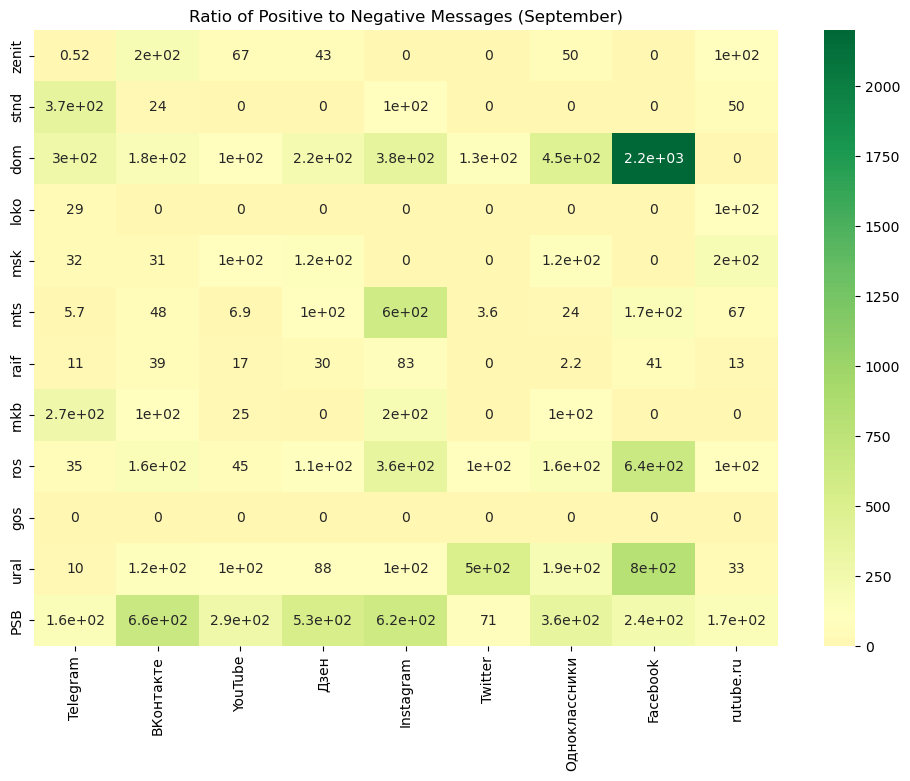

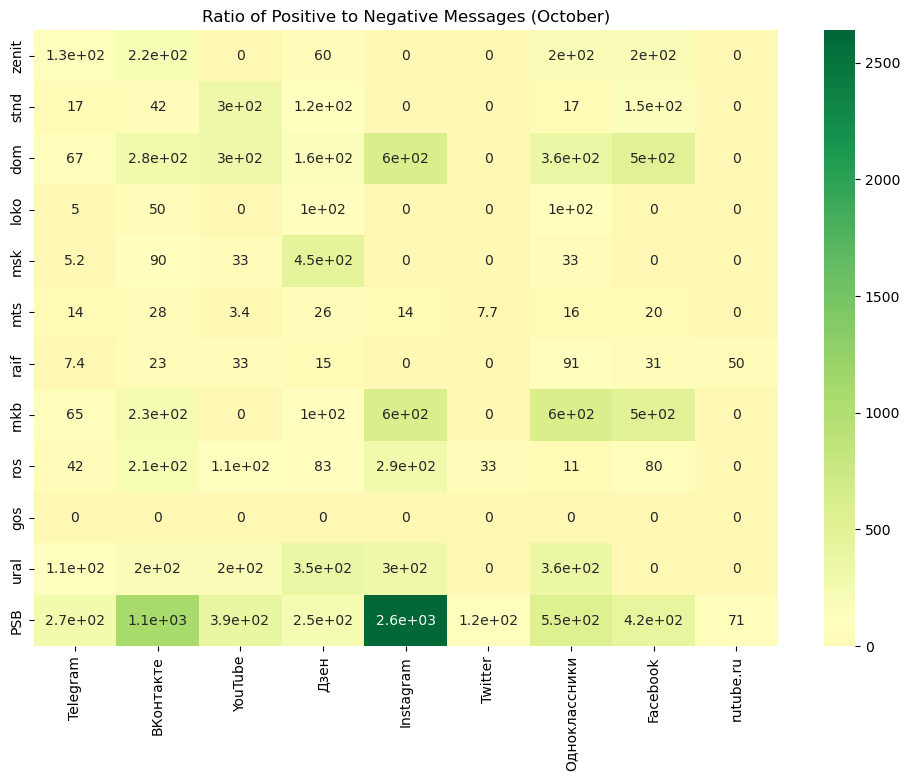

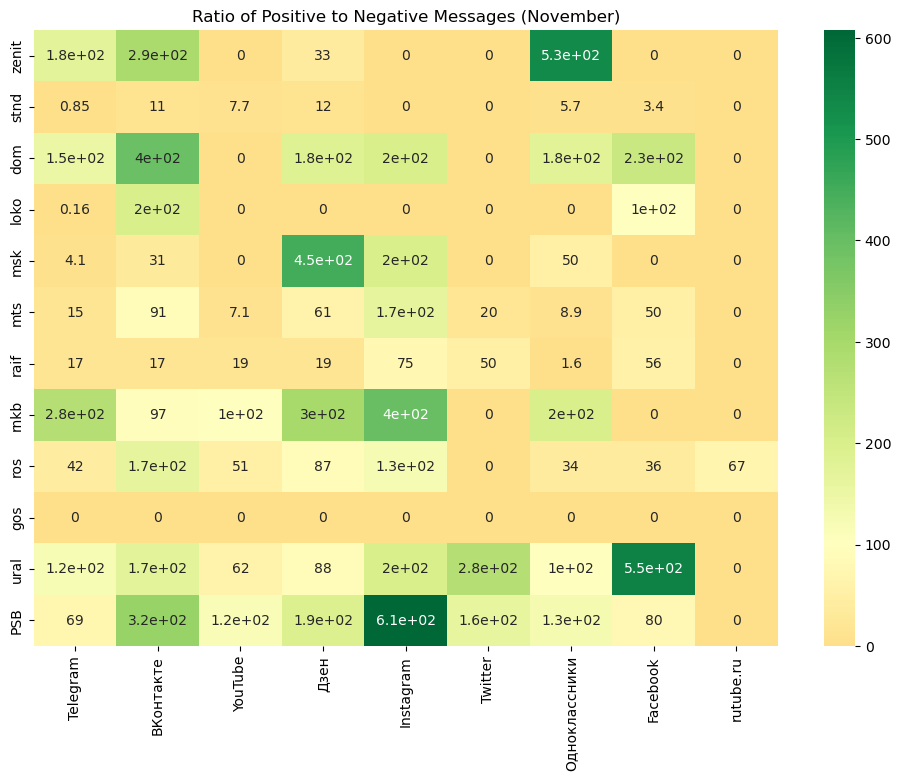

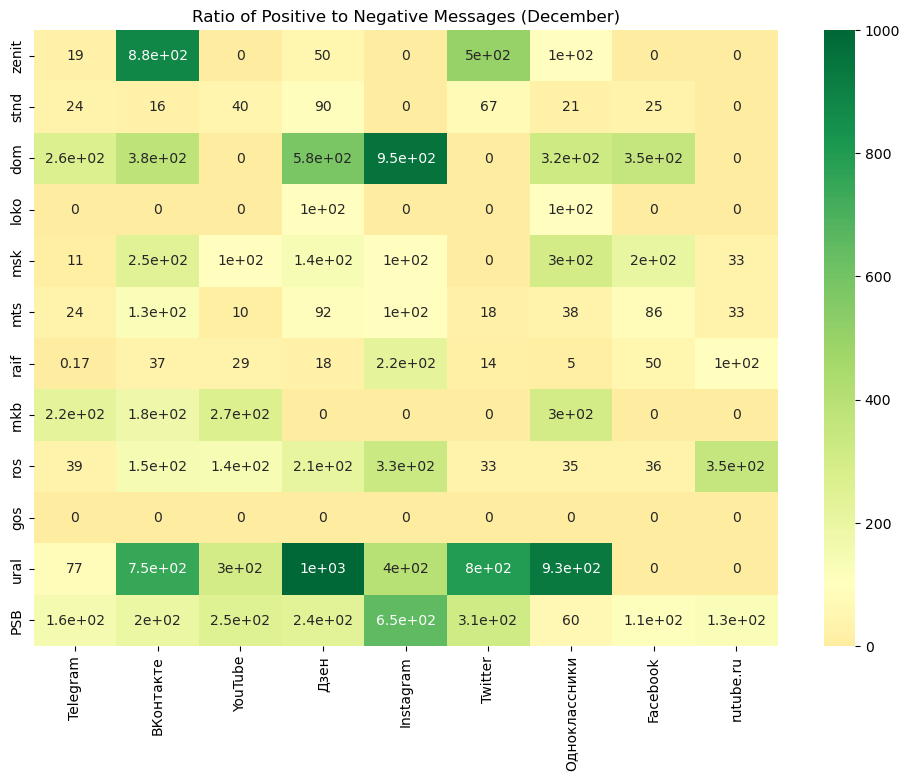

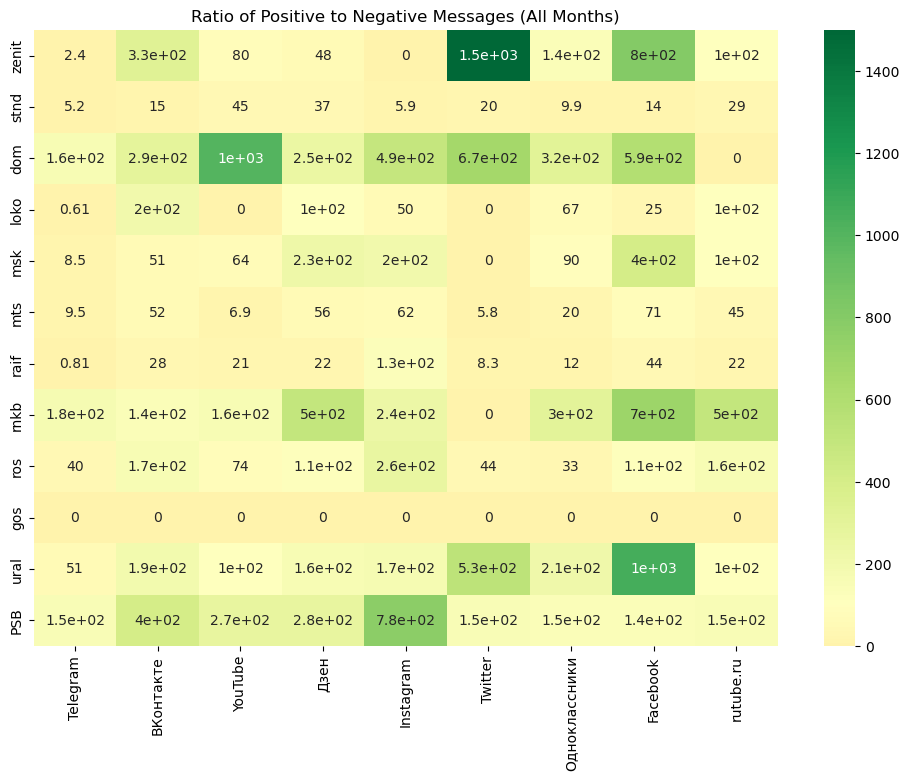

In [36]:
months_data = {
    'September': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]},
    'October': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]},
    'November': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]},
    'December': {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]}
}

for file, bank in zip(files, banks):
    df = pd.read_excel(file, skiprows=5)
    
    try:
        df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')
    except Exception as e:
        print(f"Error parsing dates for {bank}: {e}")
    
    df = df.dropna(subset=['Дата'])
    
    if not pd.api.types.is_datetime64_any_dtype(df['Дата']):
        raise ValueError(f"Date parsing failed for {bank}")
    
    df['Месяц'] = df['Дата'].dt.strftime('%B')
    
    df['Ссылка'] = df['Ссылка'].astype(str)
    
    df['Платформа'] = df['Ссылка'].apply(get_platform)
    
    for month in months_data:
        monthly_data = df[df['Месяц'] == month]
        for platform in platforms.values():
            platform_data = monthly_data[monthly_data['Платформа'] == platform]
            months_data[month][bank][platform]['positive'] += (platform_data['Тональность'] == 'позитивная').sum()
            months_data[month][bank][platform]['negative'] += (platform_data['Тональность'] == 'негативная').sum()

for month, file in special_files.items():
    df = pd.read_excel(file)
    
    try:
        df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')
    except Exception as e:
        print(f"Error parsing dates for {special_bank} ({month}): {e}")
    
    df = df.dropna(subset=['Дата'])
    
    if not pd.api.types.is_datetime64_any_dtype(df['Дата']):
        raise ValueError(f"Date parsing failed for {special_bank} ({month})")
    
    df['Месяц'] = df['Дата'].dt.strftime('%B')
    
    df['Ссылка'] = df['Ссылка'].astype(str)
    
    df['Платформа'] = df['Ссылка'].apply(get_platform)
    
    for platform in platforms.values():
        platform_data = df[df['Платформа'] == platform]
        if month in months_data and special_bank in months_data[month]:
            months_data[month][special_bank][platform]['positive'] += (platform_data['Тональность'] == 'позитивная').sum()
            months_data[month][special_bank][platform]['negative'] += (platform_data['Тональность'] == 'негативная').sum()

def calculate_ratio(positive, negative):
    return (positive / negative) * 100 if negative != 0 else 0

for month in months_data:
    heatmap_data = pd.DataFrame(index=banks + [special_bank], columns=platforms.values())
    for bank in banks + [special_bank]:
        for platform in platforms.values():
            positive = months_data[month][bank][platform]['positive']
            negative = months_data[month][bank][platform]['negative']
            ratio = calculate_ratio(positive, negative)
            heatmap_data.loc[bank, platform] = ratio
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data.astype(float), annot=True, cmap='RdYlGn', center=100)
    plt.title(f'Ratio of Positive to Negative Messages ({month})')
    plt.show()

all_months_data = {bank: {platform: {'positive': 0, 'negative': 0} for platform in platforms.values()} for bank in banks + [special_bank]}

for month in months_data:
    for bank in banks + [special_bank]:
        for platform in platforms.values():
            all_months_data[bank][platform]['positive'] += months_data[month][bank][platform]['positive']
            all_months_data[bank][platform]['negative'] += months_data[month][bank][platform]['negative']

heatmap_all_months_data = pd.DataFrame(index=banks + [special_bank], columns=platforms.values())
for bank in banks + [special_bank]:
    for platform in platforms.values():
        positive = all_months_data[bank][platform]['positive']
        negative = all_months_data[bank][platform]['negative']
        ratio = calculate_ratio(positive, negative)
        heatmap_all_months_data.loc[bank, platform] = ratio

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_all_months_data.astype(float), annot=True, cmap='RdYlGn', center=100)
plt.title('Ratio of Positive to Negative Messages (All Months)')
plt.show()